<a href="https://colab.research.google.com/github/Nish111/2710/blob/master/NeuralNetworks_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [3]:
from keras.datasets import mnist
# from keras.preprocessing.image import load_img, array_to_img
from tensorflow.keras.utils import load_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pip install tensorflow


In [36]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Load the data

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Understanding the image data format

In [38]:
X_train[0].shape

(28, 28)

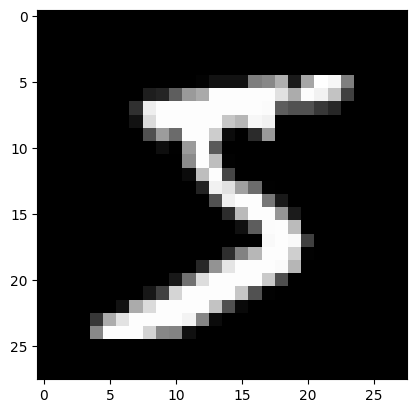

In [39]:
plt.imshow(X_train[0], cmap='gray')

In [40]:
y_train[0]

5

Preprocessing the image data

In [41]:
image_height, image_width =28, 28

In [42]:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [43]:
print(X_train[0])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [44]:
X_train /= 255.0
X_test /= 255.0
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [45]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [46]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train.shape)
print(y_test.shape)


(60000, 10)
(10000, 10)


Build a model

In [47]:
model = Sequential()

In [48]:
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

Compile the model

In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [51]:
784*512+512

401920

In [52]:
512*512+512

262656

In [53]:
512*10+10

5130

Train the model

In [54]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 26s 13ms/step - loss: 0.1834 - accuracy: 0.9436 - val_loss: 0.1052 - val_accuracy: 0.9654
Epoch 2/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0808 - accuracy: 0.9751 - val_loss: 0.0907 - val_accuracy: 0.9728
Epoch 3/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0570 - accuracy: 0.9820 - val_loss: 0.0965 - val_accuracy: 0.9728
Epoch 4/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0446 - accuracy: 0.9850 - val_loss: 0.0696 - val_accuracy: 0.9800
Epoch 5/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0342 - accuracy: 0.9893 - val_loss: 0.0763 - val_accuracy: 0.9791
Epoch 6/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0293 - accuracy: 0.9902 - val_loss: 0.0909 - val_accuracy: 0.9790
Epoch 7/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0253 - accuracy: 0.9923 - val_loss: 0.0900 -

what is the accuracy of the model

Plot the accuracy of the training model

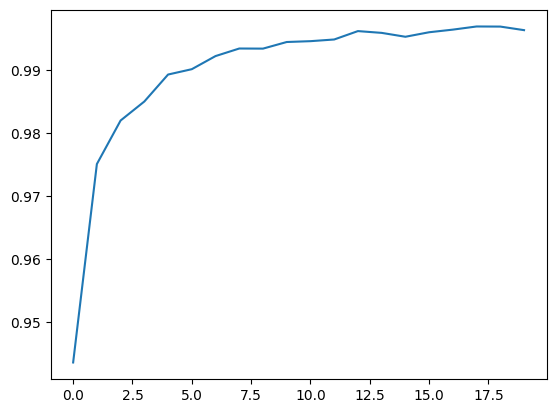

In [56]:
plt.plot(history.history['accuracy'])

In [60]:
history.history

{'loss': [0.18338853120803833,
  0.08082163333892822,
  0.057004693895578384,
  0.04461110755801201,
  0.03421054035425186,
  0.029258549213409424,
  0.025326190516352654,
  0.02137661725282669,
  0.02157595194876194,
  0.018278680741786957,
  0.017221203073859215,
  0.01732473634183407,
  0.01389611791819334,
  0.013242464512586594,
  0.018891096115112305,
  0.014310997910797596,
  0.013745217584073544,
  0.010802541859447956,
  0.011331720277667046,
  0.014212392270565033],
 'accuracy': [0.9435833096504211,
  0.9750999808311462,
  0.9820166826248169,
  0.9850333333015442,
  0.9893166422843933,
  0.9901666641235352,
  0.9922500252723694,
  0.9934499859809875,
  0.9934333562850952,
  0.9944833517074585,
  0.994616687297821,
  0.9948833584785461,
  0.9962166547775269,
  0.9959333539009094,
  0.9953166842460632,
  0.9960333108901978,
  0.9964500069618225,
  0.9969499707221985,
  0.9969333410263062,
  0.9963666796684265],
 'val_loss': [0.1052447259426117,
  0.09067539125680923,
  0.096508

Accuracy of training and validation with loss

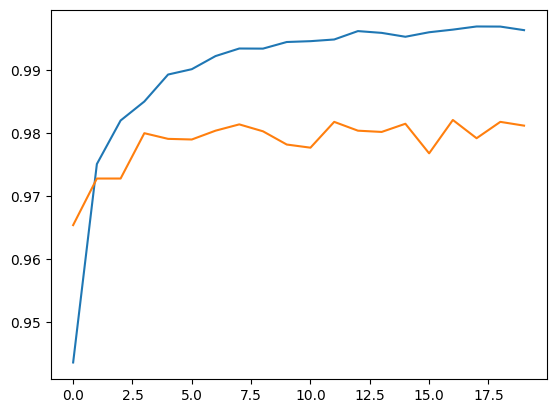

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

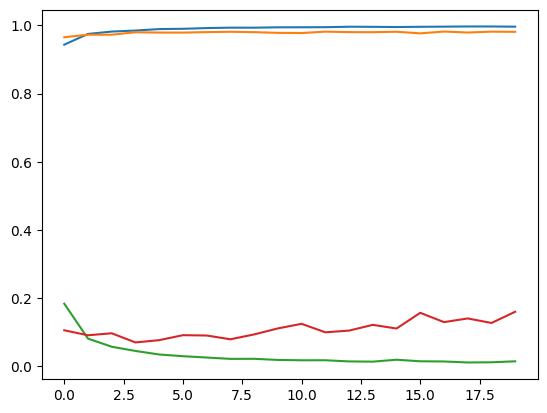

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [63]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1597 - accuracy: 0.9812


In [64]:
score

[0.15965405106544495, 0.9811999797821045]